In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/Alzheimer zip/archive (5).zip'

# Destination directory to extract the dataset
extracted_path = '/content/dataset'

# Extract the zip file
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Now your dataset is extracted in 'extracted_path' directory
# You can access the images from this directory

# Example of how to access the images:
import os
# List the contents of the directory
dataset_files = os.listdir(extracted_path)
print(dataset_files)

# Now you can work with the images in the dataset_files list


Mounted at /content/drive
['Alzheimer_s Dataset']


In [ ]:
import os
import zipfile
import numpy as np
from skimage.io import imread

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your zip file in Google Drive
zip_path = '/content/drive/MyDrive/Alzheimer zip/archive (5).zip'

# Destination directory to extract the dataset
extracted_path = '/content/Alzheimer_dataset'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Directory paths for train and test data
train_data_dir = os.path.join(extracted_path, 'Alzheimer_s Dataset', 'train')
test_data_dir = os.path.join(extracted_path, 'Alzheimer_s Dataset', 'test')

# Function to load images from directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return np.array(images)

# Load train images
train_images = []
train_labels = []
for class_folder in os.listdir(train_data_dir):
    class_path = os.path.join(train_data_dir, class_folder)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path)
        train_images.extend(images)
        train_labels.extend([class_folder] * len(images))

# Load test images
test_images = []
test_labels = []
for class_folder in os.listdir(test_data_dir):
    class_path = os.path.join(test_data_dir, class_folder)
    if os.path.isdir(class_path):
        images = load_images_from_folder(class_path)
        test_images.extend(images)
        test_labels.extend([class_folder] * len(images))

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Reshape images for logistic regression (flatten)
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Check the shape of the data
print("Train images shape:", train_images_flat.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images_flat.shape)
print("Test labels shape:", test_labels.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train images shape: (5121, 36608)
Train labels shape: (5121,)
Test images shape: (1279, 36608)
Test labels shape: (1279,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
model = LogisticRegression(max_iter=50)

# Train the model
model.fit(train_images_flat, train_labels)

# Predict on the test set
predictions = model.predict(test_images_flat)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5551211884284597


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize SVM classifier
svm = SVC(kernel='linear', C=1.0)

# Train the SVM classifier
svm.fit(train_images_flat, train_labels)

# Predict on the test set
predictions_svm = svm.predict(test_images_flat)

# Calculate accuracy
accuracy_svm = accuracy_score(test_labels, predictions_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.63721657544957


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate SVM model
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(test_labels, predictions_svm))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, predictions_svm))


SVM Accuracy: 0.63721657544957
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.89      0.27      0.41       179
ModerateDemented       1.00      0.33      0.50        12
     NonDemented       0.66      0.81      0.72       640
VeryMildDemented       0.57      0.55      0.56       448

        accuracy                           0.64      1279
       macro avg       0.78      0.49      0.55      1279
    weighted avg       0.66      0.64      0.62      1279

Confusion Matrix:
[[ 48   0  66  65]
 [  0   4   4   4]
 [  3   0 516 121]
 [  3   0 198 247]]


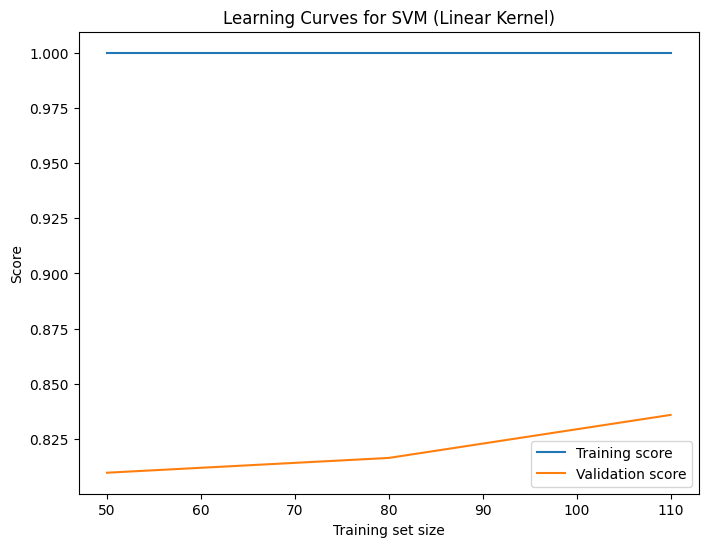

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)
train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5
)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curves for SVM (Linear Kernel)')
plt.legend()
plt.show()


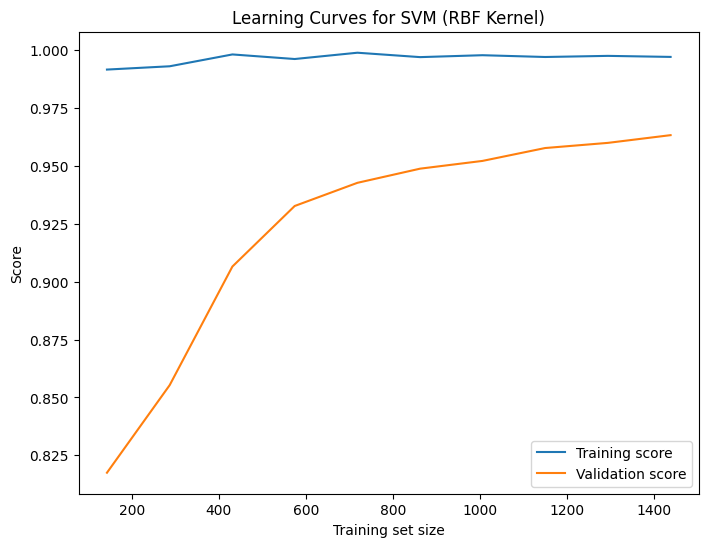

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

X, y = load_digits(return_X_y=True)

# Using larger range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 evenly spaced training set sizes from 10% -100%

train_sizes_abs, train_scores, valid_scores = learning_curve(
    SVC(kernel='rbf', C=1.0, gamma='scale'), X, y, train_sizes=train_sizes, cv=5
)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes_abs, np.mean(valid_scores, axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curves for SVM (RBF Kernel)')
plt.legend()
plt.show()


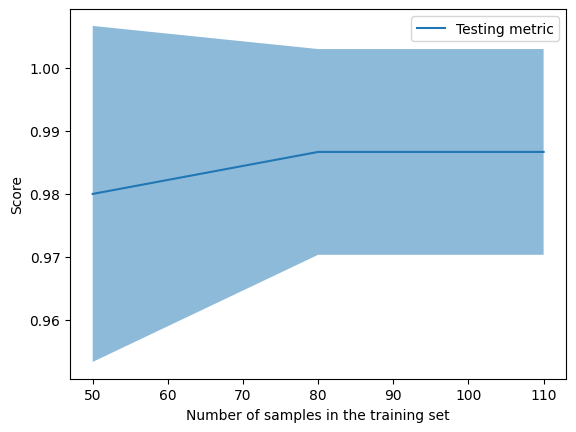

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)